# 인공 신경망 구조 이해하기

In [1]:
!pip install matplotlib

In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random

# Write neural network code
class NeuralNetwork(nn.Module):

    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(1, 24)
        self.activation = nn.ReLU()
        self.hidden_layers = [nn.Linear(24, 24) for _ in range(5)]
        self.output_layer = nn.Linear(24, 1)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.activation(x)
        for i in self.hidden_layers:
            i(x)
            self.activation(x)
        x = self.output_layer(x)
        return x

# Define the network and the loss function.
network = NeuralNetwork()
loss_function = nn.MSELoss()

# Steps for gradient descent.
# 'lr' stands for learning rate.
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

# Training one step with sample data
x = torch.Tensor([1])
y = x**3 + x**2 - x - 1


optimizer.zero_grad()
output = network(x)
loss = loss_function(y, output)
loss.backward()
optimizer.step()

# Check parameters
parameters = network.input_layer.state_dict()
w = parameters['weight']  # e.g. [-5, -1.2, 1.2, 1.2, 2, 5]
b = parameters['bias']  # e.g. [-7.7, -1.3, 1, -0.2, -1.1, -5]
print(w)
print(b)

tensor([[ 0.0193],
        [-0.4860],
        [ 0.9770],
        [-0.4797],
        [ 0.6803],
        [ 0.2290],
        [-0.5530],
        [-0.7889],
        [-0.3448],
        [-0.7135],
        [-0.3147],
        [ 0.7574],
        [ 0.1127],
        [ 0.7387],
        [-0.7243],
        [ 0.6448],
        [-0.1312],
        [-0.2319],
        [ 0.5790],
        [ 0.7502],
        [ 0.2647],
        [-0.5197],
        [-0.0355],
        [ 0.6286]])
tensor([ 0.2913,  0.7579, -0.3823, -0.1772,  0.4321, -0.8709, -0.9023,  0.3994,
         0.7638, -0.9527,  0.5804,  0.3311,  0.2443, -0.2111,  0.5002, -0.1850,
        -0.7316,  0.3257,  0.4239,  0.5104,  0.9099,  0.0846,  0.1105, -0.8356])


In [85]:
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define the network and the loss function.
network = NeuralNetwork()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

pbar = tqdm(range(10000), desc="Loss: --")
for epoch in pbar:
    x = (torch.rand(1)-0.5)*10
    y = x**3 + x**2 - x - 1
    # y = x**4-14*x**3-83*x**2+168*x+540

    optimizer.zero_grad()
    output = network(x)
    loss = loss_function(y, output)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        pbar.set_description(f"Loss: {loss.item():.3f}")

Loss: 1.196: 100%|██████████| 10000/10000 [00:07<00:00, 1314.00it/s] 


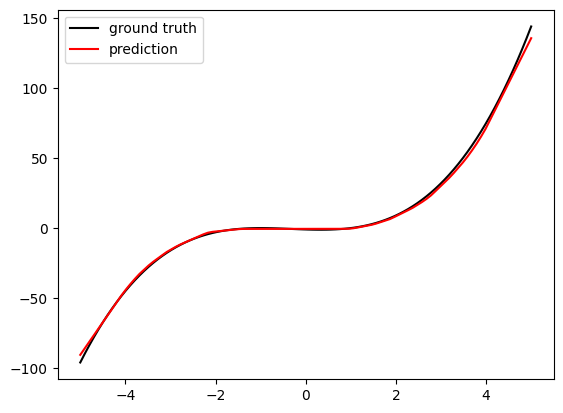

In [86]:
# plot the result
x_lim = 5
num_points = 100

x = torch.linspace(-x_lim, x_lim, num_points)
y = x**3 + x**2 - x - 1
# y= x**4-14*x**3-83*x**2+168*x+540
plt.plot(x, y, label="ground truth", color="black")
plt.plot(x, network(x[:, None]).detach().numpy(), label="prediction", color="red")
plt.legend()
plt.show()